# NAUKA

Import bibliotek

In [1]:
# Podstawy

import pandas as pd
import numpy as np

In [32]:
# Wizualizacja

import matplotlib.pyplot as plt
import seaborn as sns

Nauka

In [3]:
import tensorflow as tf

dense_layer = tf.keras.layers.Dense(32)

# albo bardziej dosłownie

dense_layer = tf.keras.layers.Dense(units=32)

In [4]:
flatten = tf.keras.layers.Flatten()

In [5]:
seq_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, name="input_layer"),
    tf.keras.layers.Dense(32, name="hidden_layer"),
    tf.keras.layers.Dense(4, name="output_layer")
])

input_data = tf.ones((16, 3, 3))

output = seq_model(input_data)

In [7]:
print(output)

tf.Tensor(
[[-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]
 [-0.0859749   0.5561688   0.30793285 -0.33146128]], shape=(16, 4), dtype=float32)


FASHION MNIST

In [14]:
from keras.datasets import fashion_mnist

train, test = fashion_mnist.load_data()

In [16]:
images, labels = train

# normalizacja wartości pikseli (maks. wartość
# wynosi 255.0, czyli aby znormalizować nasze dane,
# musimy podzielić każdy piksel przez maks. wartość)

# skąd się wzięła i co oznacza ta "maks. wartość"? W dokumentacji nie widzę o tym wzmianki. Czy to ma coś wspólnego z DPI?

images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [34]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu', name="input_layer"),
    tf.keras.layers.Dense(64, activation='relu', name="hidden_layer_1"),
    tf.keras.layers.Dense(32, activation='relu', name="hidden_layer_2"),
    tf.keras.layers.Dense(10, activation='softmax', name="output_layer")
])

In [35]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
stats = model_2.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7880
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4207 - accuracy: 0.8483
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3902 - accuracy: 0.8582
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3680 - accuracy: 0.8660
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8699
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3430 - accuracy: 0.8741
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3333 - accuracy: 0.8760
Epoch 8/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.3253 - accuracy: 0.8800
Epoch 9/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3197 - accuracy: 0.8826
Epoch 10/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.310

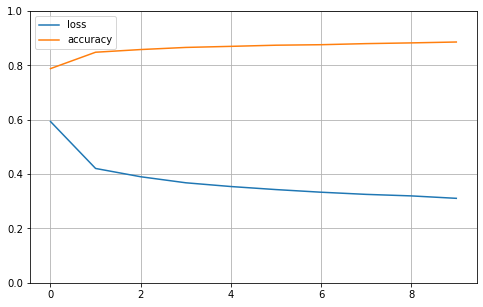

In [37]:
pd.DataFrame(stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
y_pred = model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

188/188 [==============================] - 0s 841us/step
probs :  [3.7623086e-12 1.0000000e+00 8.1625689e-13 5.3648758e-10 1.2091707e-13
 1.4352120e-23 2.2513194e-10 7.1607278e-32 3.6641390e-19 9.0775535e-19]
klasa : 1
rzeczywista klasa:  1


FUNCTIONAL  API

In [40]:
# stworzenie wejścia

input = tf.keras.Input(shape=X_train.shape[1:])

# możemy wypisać, co ta warstwa przyjmuje - jest to rozmiar
# naszego obrazka bez batch_size (który ma wartość None)
print(input)

# spłaszczenie wejścia
input_flat = tf.keras.layers.Flatten(input_shape=[28,28])(input)

# nasza kolejna warstwa jest typu Dense, jak poprzednio, ale od razu
# i bezpośrednio przekazujemy jej wejście, tak jak funkcji w Pythonie:
hidden_1 =tf.keras.layers.Dense(320, activation='relu', name="hidden_1")(input_flat)
hidden_2 =tf.keras.layers.Dense(150, activation='relu', name="hidden_2")(hidden_1)

# złączamy wyniki z obu warstw za pomocą warstwy typu Concatenate
concat_layer = tf.keras.layers.Concatenate()([input_flat, hidden_2])
output = tf.keras.layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model_res = tf.keras.Model(inputs=[input], outputs=[output])

# podsumowanie naszego modelu
model_res.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_4 (Flatten)            (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 hidden_1 (Dense)               (None, 320)          251200      ['flatten_4[0][0]']              
                                                                                                  
 hidden_2 (Dense)               (None, 150)  

In [43]:
text = np.array([["ala ma kota"]])

input_1 = tf.keras.Input(shape=text.shape[1:])
input_2 = tf.keras.Input(shape=X_train.shape[1:])

# nasza kolejna warstwa jest typu Dense, jak poprzednio,
# ale od razu przekazujemy jej wejście, tak jak funkcji w Pythonie
hidden_1 =tf.keras.layers.Dense(320, activation='relu')(input_1)
hidden_2 =tf.keras.layers.Dense(150, activation='relu')(hidden_1)

# złączamy wyniki naszych warstw za pomocą warstwy
# typu Concatenate podając jako argumenty input_1 oraz hidden_2
concat_layer = tf.keras.layers.Concatenate()([input_1, hidden_2])
output = tf.keras.layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

# podsumowanie naszego modelu
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 320)          640         ['input_5[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 150)          48150       ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 151)          0           ['input_5[0][0]',                
                                                                  'dense_4[0][0]']          

In [44]:
# kompilacja
model_res.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#szkolenie na takich samych danych jak poprzednio
train_stats = model_res.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4825 - accuracy: 0.8262
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3623 - accuracy: 0.8683
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3284 - accuracy: 0.8795
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3031 - accuracy: 0.8888
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2828 - accuracy: 0.8944
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.8988
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2541 - accuracy: 0.9052
Epoch 8/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2422 - accuracy: 0.9095
Epoch 9/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2329 - accuracy: 0.9125
Epoch 10/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.223